<a href="https://colab.research.google.com/github/cohench123/cohen_INFO4670_Spring2026/blob/main/Assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Quality Check

1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

In [ ]:
# Write your code here
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plot
df = pd.read_csv('Assignment 2 dataset.csv')
print(df.head())
print(df.info())

   Column 1        Date  AveragePrice  Total Volume     4046       4225  \
0         0  12-27-2015          1.33      64236.62  1036.74   54454.85   
1         1  12-20-2015          1.35      54876.98   674.28   44638.81   
2         2  12-13-2015          0.93     118220.22   794.70  109149.67   
3         3   12-6-2015          1.08      78992.15  1132.00   71976.41   
4         4  11-29-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4 

**I have loaded the dataset and am ready to examine.**

Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.


Distribution of region:
region
WestTexNewMexico       340
Albany                 338
BaltimoreWashington    338
Boise                  338
Boston                 338
Atlanta                338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
BuffaloRochester       338
LasVegas               338
LosAngeles             338
MiamiFtLauderdale      338
Louisville             338
Nashville              338
NewOrleansMobile       338
NewYork                338
Midsouth               338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 

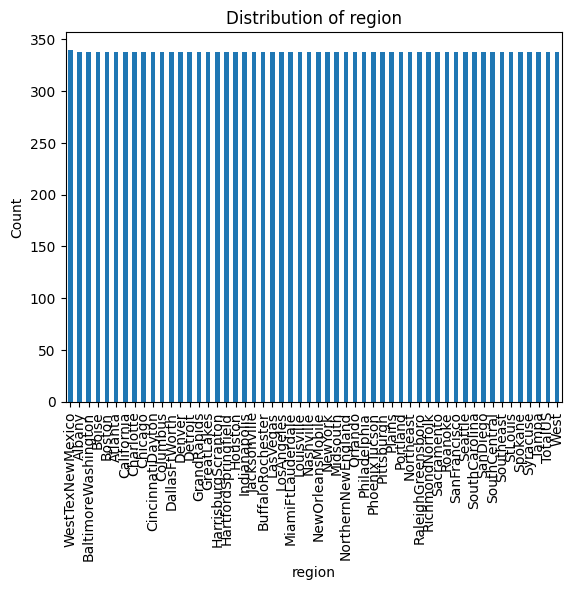


Distribution of type:
type
organic         9127
conventional    9126
Name: count, dtype: int64


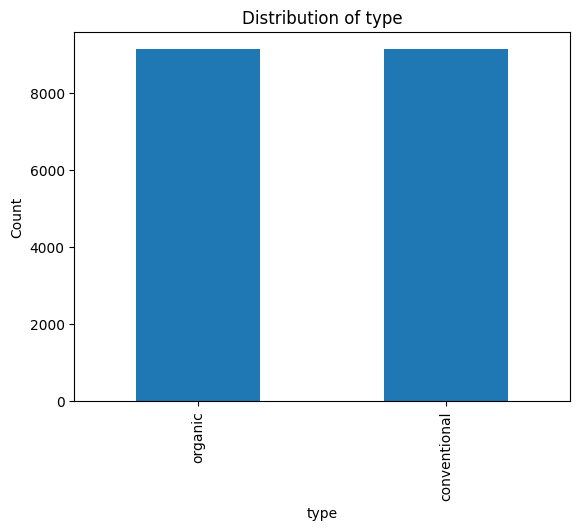


Distribution of year:
year
2017    5722
2016    5616
2015    5615
2018    1300
1904       1
Name: count, dtype: int64


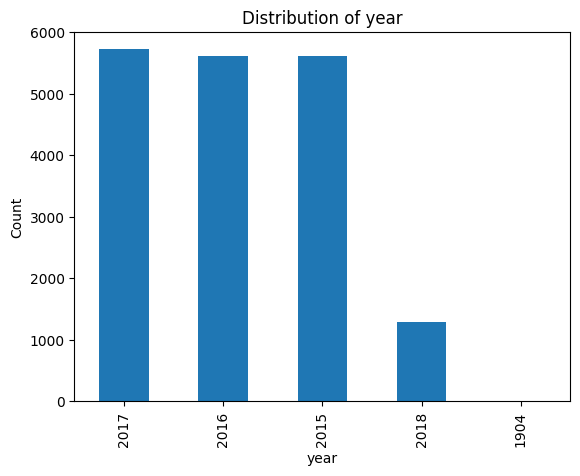

           Column 1  AveragePrice  Total Volume          4046          4225  \
count  18254.000000  18254.000000  1.825300e+04  1.825200e+04  1.825300e+04   
mean      24.228060      1.406073  8.504609e+05  2.929605e+05  2.950905e+05   
std       15.480994      0.402668  3.453189e+06  1.264891e+06  1.203996e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.084277e+04  8.544900e+02  3.006890e+03   
50%       24.000000      1.370000  1.073061e+05  8.640940e+03  2.905471e+04   
75%       38.000000      1.660000  4.329238e+05  1.109857e+05  1.500448e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.825300e+04  1.825300e+04  1.825200e+04  1.825200e+04   18253.000000   
mean   2.283481e+04  2.395890e+05  1.821666e+05  5.432919e+04    3105.745759   
std    1.074528e+05  9.861401e+05  7.461204e+05 

In [ ]:
# Write your code here
for col in ['region', 'type', 'year']:
    print(f"\nDistribution of {col}:")
    print(df[col].value_counts())
# Bar chart for each column
    df[col].value_counts().plot(kind='bar')
    plot.title(f'Distribution of {col}')
    plot.xlabel(col)
    plot.ylabel("Count")
    plot.show()

# Summary of the dataset
print(df.describe())


**My interpretation of this dataset is that regions are evenly spread, type is even, but for the years 2018 is rather barren and there is an outlier with 1904 which is a possible error, a majority of the entires are for 2015-2017. For the average price the mean is 1.41, the median is 1.37 the range is 0.44 to 3.25, the prices are moderately distributed. The mean and median are fairly close so the data is not skewed, the max price is much higher than the average so possibly the average prices are relatively consistent with moderate variation and a few high price outliers. Total volume mean is 825,000, the max is 6.25 million, sales volume varies significantly across regions and weeks with some extremely large markets that dominate the dataset. Small bags have the highest average counts, large bags have lower averages, Xlarge bags have low medians and many zeros. Most sales occur in the small bag format with extra larges being rare.**


1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

In [ ]:
# Write your code here

# Checking for duplicate rows
dup_rows = df.duplicated().sum()
print("Duplicate rows:", dup_rows)
# Checking for missing values
missing_values = df.isnull().sum()
print("\nmissing values per column:")
print(missing_values)

Duplicate rows: 2

missing values per column:
Column 1        0
Date            0
AveragePrice    0
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
year            0
region          0
dtype: int64


**To handle the issues I would remove the duplicated rows from the dataset, for the columns like region and type I would replace the empty entries with "Unknown".**

1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

In [ ]:
# Write your code here
print("Dataset shape:", df.shape)

# Getting size of the dataset, rows columns
rows = df.shape[0]
cols = df.shape[1]
print("Number of rows:", rows)
print("Number of cols:", cols)


Dataset shape: (18254, 14)
Number of rows: 18254
Number of cols: 14


**I would say that the dataset is sufficient for machine learning training, there are 18254 entries which could be used to train an AI for market research of this product.**

#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [ ]:
# Write your code here

# Removing the first column of the dataset
if 'Column 1' in df.columns:
  df = df.drop(columns={'Column 1'})

# Treating the year as nominal
df['year'] = df['year'].astype(str)

print(df.dtypes)

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year             object
region           object
dtype: object


2.2 Check for duplicate values and remove them.

In [ ]:
# Write your code here

# Checking for duplicates
print("Dupes before deletion:", df.duplicated().sum())

# Removing the duplicates
df = df.drop_duplicates()

print("Dupes after deletion:", df.duplicated().sum())

Dupes before deletion: 2
Dupes after deletion: 0


2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [ ]:
# Write your code here

# Checking for missing values
print(df.isnull().sum())

# Counting missing values in each row
missing_in_row = df.isnull().sum(axis=1)

# Removing the rows where a majority of the values are missing
threshold = int(len(df.columns) * 0.5)
df = df[missing_in_row < threshold]

# Filling missing values with the median
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

for col in numeric_cols:
  df[col] = df.groupby('region')[col].transform(
      lambda x: x.fillna(x.median())
  )

# Filling categorical missing values
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
  df[col] = df[col].fillna("Unknown")

print("Remaining missing values:")
print(df.isnull().sum())

Date            0
AveragePrice    0
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
year            0
region          0
dtype: int64
Remaining missing values:
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


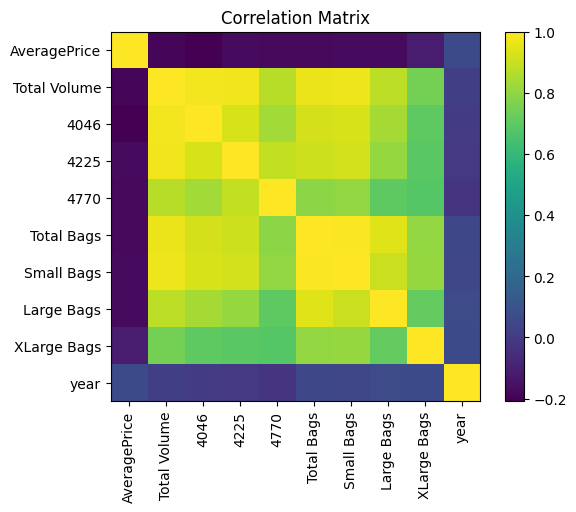

In [ ]:
# Write your code here
import matplotlib.pyplot as plot

# Converting the year to numeric to find correlation
temp_df = df.copy()
temp_df['year'] = temp_df['year'].astype(int)

corr_matrix = temp_df.corr(numeric_only=True)

# Making a plot correlation matrix
plot.figure()
plot.imshow(corr_matrix)
plot.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plot.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plot.colorbar()
plot.title("Correlation Matrix")
plot.show()

**The matrix shows high correlation between the total volume, 4046, 4225, 2770, total bags, small bags, and large bags.**

#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

In [ ]:
# Write your code here
# Variable types
continuous_variables = df.select_dtypes(include=['float64','int64']).columns
categorical_variables = df.select_dtypes(include=['object']).columns
print("Categorical variables:", categorical_variables)
print("Continuous Variables:", continuous_variables)

# Categorical variable values
for col in categorical_variables:
    print(f"\nUnique values for {col}:")
    print(df[col].unique())

# Continous variable stats
for col in continuous_variables:
    print(f"\n--- {col} ---")
    print("Min:", df[col].min())
    print("Max:", df[col].max())
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print(df[col].describe())

Categorical variables: Index(['Date', 'type', 'year', 'region'], dtype='object')
Continuous Variables: Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')

Unique values for Date:
['12-27-2015' '12-20-2015' '12-13-2015' '12-6-2015' '11-29-2015'
 '11-22-2015' '11-15-2015' '11-8-2015' '11-1-2015' '10-25-2015'
 '10-18-2015' '10-11-2015' '10-4-2015' '9-27-2015' '9-20-2015' '9-13-2015'
 '9-6-2015' '8-30-2015' '8-23-2015' '8-16-2015' '8-9-2015' '8-2-2015'
 '7-26-2015' '7-19-2015' '7-12-2015' '7-5-2015' '6-28-2015' '6-21-2015'
 '6-14-2015' '6-7-2015' '5-31-2015' '5-24-2015' '5-17-2015' '5-10-2015'
 '5-3-2015' '4-26-2015' '4-19-2015' '4-12-2015' '4-5-2015' '3-29-2015'
 '3-22-2015' '3-15-2015' '3-8-2015' '3-1-2015' '2-22-2015' '2-15-2015'
 '2-8-2015' '2-1-2015' '1-25-2015' '1-18-2015' '1-11-2015' '1-4-2015'
 '12-25-2016' '12-18-2016' '12-11-2016' '12-4-2016' '11-27-2016'
 '11-20-2016' '11-13-2016' 

**The continuous variables are AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, and XLarge Bags. Categorical Variables are Date, type, year, and region.**

3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

In [ ]:
# Write your code here

# Convert the date to datetime for easier analysis.
df['Date'] = pd.to_datetime(df['Date'])

# Finding the earliest date in the dataset
earliest_date = df['Date'].min()
print("Earliest Date:", earliest_date)

# Checking the data before 2010
before_2010 = df[df['Date'] < '2010-01-01']
print("Records before 2010:", len(before_2010))

Earliest Date: 1904-01-21 00:00:00
Records before 2010: 1


**The one entry from before 2010 is a date from 1904 which is most likely an error, it is obviously not reasonable and should be removed.**

3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

In [ ]:
# Write your code here
# Finding the highest average price
price = df['AveragePrice'].max()
# Finding the row with the highest average price
highest_avprice_row = df.loc[df['AveragePrice'].idxmax()]
print("Highest Average Price:", price)
print("Region:", highest_avprice_row['region'])

Highest Average Price: 3.25
Region: SanFrancisco


**To obtain the resulting highest average price of 3.25 in San Francisco, I used the max function to find the highest average price, and then used idxmax to find the row that it belonged to and find the region.**

3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

In [ ]:
# Write your code here
# Finding the highest total volume
volume = df['Total Volume'].max()
# Finding the row with the highest total volume
highest_vol_row = df.loc[df['Total Volume'].idxmax()]
print("Highest Total Volume:", volume)
print("Region:", highest_vol_row['region'])

Highest Total Volume: 62505646.52
Region: TotalUS


**To find the highest total volume I used the max function, and then used idxmax to find the row it belonged to and the region.**